In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'CS3540/CS3540-Final-Project-G12/atruewor'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['US_inflation_rates.csv', 'ProductPriceIndex.csv', 'unemployment.csv', 'avocado.csv', 'food_price_inflation.csv', 'US_CPI.csv', 'avocado_inflation_ava.ipynb']


In [3]:
# import modules
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, normalize

In [4]:
cpi = pd.read_csv(GOOGLE_DRIVE_PATH + "/US_CPI.csv")
produce = pd.read_csv(GOOGLE_DRIVE_PATH + "/ProductPriceIndex.csv")

In [5]:
cpi["Yearmon"] = pd.to_datetime(cpi["Yearmon"], format="%d-%m-%Y")
for i in cpi.index:
  cpi.loc[i, 'Yearmon'] = cpi.loc[i, 'Yearmon'].strftime('%Y-%m')
cpi.columns=['date', 'cpi']

In [6]:
produce['date'] = pd.to_datetime(produce['date'])
produce = produce[['productname', 'date', 'farmprice']]
produce = produce.drop(2590)
for i in produce.index:
  produce.loc[i, 'date'] = produce.loc[i, 'date'].strftime('%Y-%m')
produce['farmprice'] = produce['farmprice'].str.replace('$', '', regex=False)
produce['farmprice'] = produce['farmprice'].astype(float)

In [7]:
broccoli = produce[produce['productname'] == 'Broccoli Crowns']
cauliflower = produce[produce['productname'] == 'Cauliflower']
potatoes = produce[produce['productname'] == 'Potatoes']
avocado = produce[produce['productname'] == 'Avocados']
strawberries = produce[produce['productname'] == 'Strawberries']

In [8]:
broccoli= broccoli.groupby('date')['farmprice'].max()
cauliflower = cauliflower.groupby('date')['farmprice'].max()
potatoes = potatoes.groupby('date')['farmprice'].max()
avocado = avocado.groupby('date')['farmprice'].max()
strawberries = strawberries.groupby('date')['farmprice'].max()

In [9]:
combined_broc = pd.merge(left=broccoli, right=cpi, on='date')

combined_cauli = pd.merge(left=cauliflower, right=cpi, on='date')
combined_cauli = combined_cauli.drop('date', axis=1)

combined_pota = pd.merge(left=potatoes, right=cpi, on='date')
combined_pota = combined_pota.drop('date', axis=1)

combined_avo = pd.merge(left=avocado, right=cpi, on='date')

combined_straw = pd.merge(left=strawberries, right=cpi, on='date')

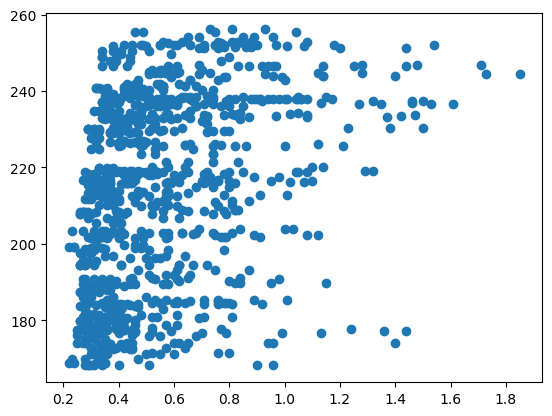

In [37]:
x = combined_broc['farmprice']
y = combined_broc['cpi']

plt.scatter(x,y)

Text(0.5, 1.0, 'Farm Price of Cauliflower vs CPI ')

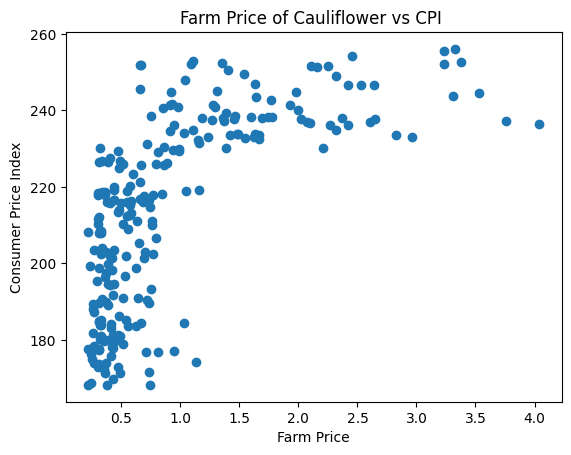

In [43]:
x = combined_cauli['farmprice']
y = combined_cauli['cpi']

plt.scatter(x,y)
plt.xlabel('Farm Price')
plt.ylabel('Consumer Price Index')
plt.title('Farm Price of Cauliflower vs CPI ')

Text(0.5, 1.0, 'Farm Price of Potatoes vs CPI ')

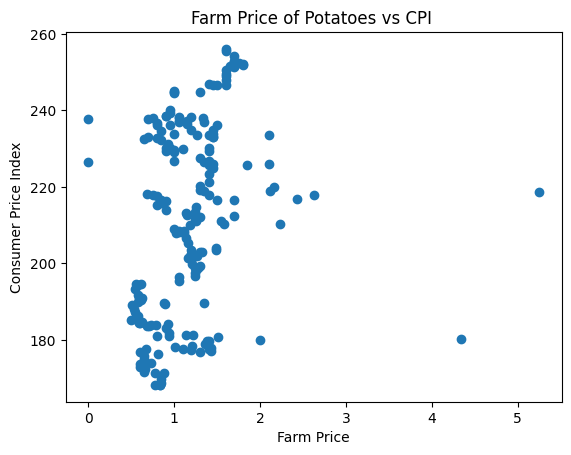

In [44]:
x = combined_pota['farmprice']
y = combined_pota['cpi']

plt.scatter(x,y)
plt.xlabel('Farm Price')
plt.ylabel('Consumer Price Index')
plt.title('Farm Price of Potatoes vs CPI ')

Text(0.5, 1.0, 'Farm Price of Avocado vs CPI ')

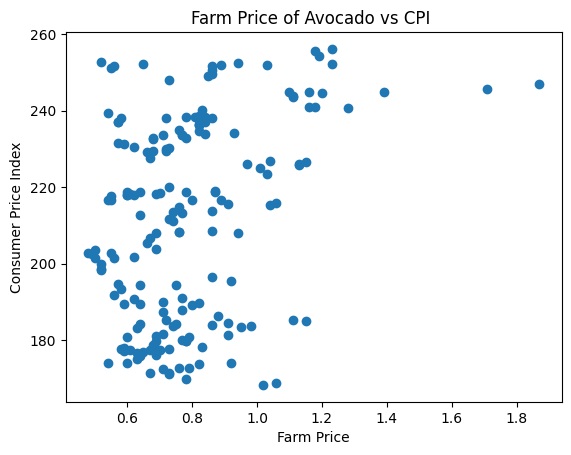

In [45]:
x = combined_avo['farmprice']
y = combined_avo['cpi']

plt.scatter(x,y)
plt.xlabel('Farm Price')
plt.ylabel('Consumer Price Index')
plt.title('Farm Price of Avocado vs CPI ')

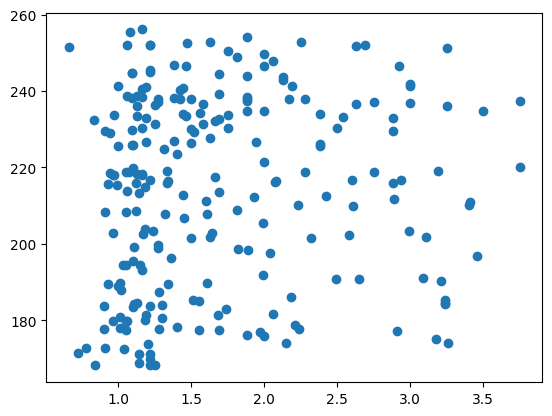

In [60]:
x = combined_straw['farmprice']
y = combined_straw['cpi']

plt.scatter(x,y)

/tmp/ipython-input-2206508727.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r+" (-> color='r'). The keyword argument will take precedence.
  plt.plot(combined_cauli.farmprice, combined_cauli.cpi, "r+",color = "blue", label='Traning Data')


Text(0.5, 1.0, 'Farm Price of Cauliflower vs CPI ')

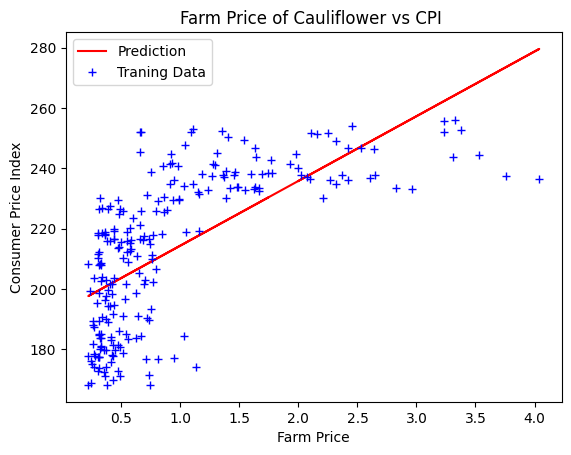

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.coef_

f = model.predict(X_train)

plt.plot(X_train, f, color = "red", label='Prediction')
plt.plot(combined_cauli.farmprice, combined_cauli.cpi, "r+",color = "blue", label='Traning Data')
plt.legend(loc=2)
plt.xlabel('Farm Price')
plt.ylabel('Consumer Price Index')
plt.title('Farm Price of Cauliflower vs CPI ')

In [64]:
y_pred = model.predict(X_test)
mean_squared_error(y_test, y_pred)

278.47035448514885

In [128]:
cols = combined_cauli.shape[1]
X = combined_cauli.iloc[:,0:cols-1] # iloc slicing function
Y = combined_cauli.iloc[:,cols-1:cols]
X.shape, Y.shape

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

/tmp/ipython-input-4260387205.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r+" (-> color='r'). The keyword argument will take precedence.
  plt.plot(combined_cauli.farmprice, combined_cauli.cpi, "r+",color = "blue", label='Traning Data')


Text(0.5, 1.0, 'Farm Price of Cauliflower vs CPI ')

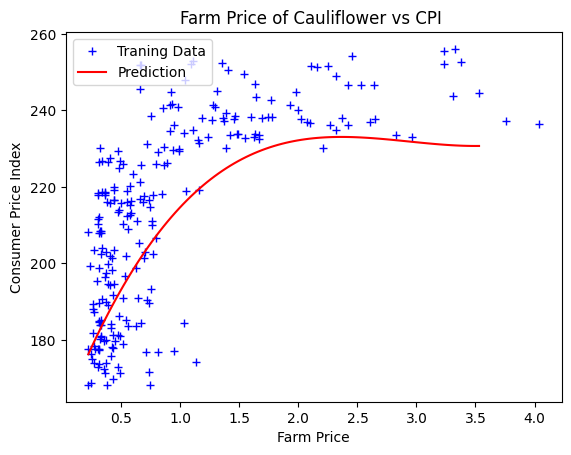

In [129]:
# polydegree
poly=PolynomialFeatures(degree=3, include_bias=False)
X_poly=poly.fit_transform(X_train)

poly_model=LinearRegression()
poly_model.fit(X_poly,y_train)

theta = poly_model.coef_.T

plt.plot(combined_cauli.farmprice, combined_cauli.cpi, "r+",color = "blue", label='Traning Data')
min_x = np.min(X_test)
max_x = np.max(X_test)
# get range of data to transform and make predictions on
min_max_range = np.linspace(min_x, max_x, 100).reshape(-1,1)
polynomial_min_max_range = poly.fit_transform(min_max_range)
y_vals = np.dot(polynomial_min_max_range, theta)
plt.plot(min_max_range, y_vals+160, color='red', label='Prediction')

plt.legend(loc=2)
plt.xlabel('Farm Price')
plt.ylabel('Consumer Price Index')
plt.title('Farm Price of Cauliflower vs CPI ')

In [130]:
X_poly_test = poly.fit_transform(X_test)

y_pred = poly_model.predict(X_poly_test)

mean_squared_error(y_test, y_pred)

219.48977482403737

In [131]:
r2_score(y_test, y_pred)

0.6332954406844524

In [134]:
combined_cauli['cpi'].var()

633.7719941541297